# ⚡ Activation Functions - Adding Non-Linearity

Welcome to the third notebook! We've learned about neurons and how they compute weighted sums. Now we're going to add the **secret ingredient** that makes neural networks powerful: **activation functions**!

## 🎯 What You'll Learn

By the end of this notebook, you'll understand:
- **Why** we need activation functions (the non-linearity problem)
- The most important activation functions and how they work
- How to implement each one from scratch
- When to use which activation function
- How activation functions enable neural networks to learn complex patterns

**Prerequisites:** Notebooks 1 and 2, basic understanding of neurons and weights.

In [31]:
# Import our tools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# For nice plots
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

---
## 🤔 The Problem: Why We Need Activation Functions

Let's start with a fundamental question: **Why can't we just stack neurons without activation functions?**

### The Linear Limitation

Remember, a neuron without activation is just:
```
output = w₁·x₁ + w₂·x₂ + ... + b
```

This is a **linear function**. It creates straight lines (or flat planes in higher dimensions).

### What Happens When We Stack Linear Functions?

In [32]:
# Let's see what happens when we stack linear transformations

# Input
x = 5.0

# Layer 1: Linear transformation
w1 = 2.0
b1 = 3.0
h1 = w1 * x + b1  # h1 = 2*5 + 3 = 13

# Layer 2: Another linear transformation
w2 = 1.5
b2 = -2.0
output = w2 * h1 + b2  # output = 1.5*13 - 2 = 17.5

print("Two-layer network (no activation):")
print(f"  Input: x = {x}")
print(f"  Layer 1: h1 = {w1}·{x} + {b1} = {h1}")
print(f"  Layer 2: output = {w2}·{h1} + {b2} = {output}")

# Now let's collapse this into a single layer
# y = w₂·(w₁·x + b₁) + b₂
# y = (w₂·w₁)·x + (w₂·b₁ + b₂)
w_combined = w2 * w1  # Combined weight
b_combined = w2 * b1 + b2  # Combined bias
output_direct = w_combined * x + b_combined

print("\nEquivalent single-layer network:")
print(f"  output = {w_combined}·{x} + {b_combined} = {output_direct}")

print("\n🔍 Key Insight:")
print(f"  Two layers give same result as one layer!")
print(f"  Both outputs: {output} = {output_direct}")
print(f"\n  💡 Stacking linear functions = Another linear function!")
print(f"  💡 Adding more layers doesn't help without activation functions!")

Two-layer network (no activation):
  Input: x = 5.0
  Layer 1: h1 = 2.0·5.0 + 3.0 = 13.0
  Layer 2: output = 1.5·13.0 + -2.0 = 17.5

Equivalent single-layer network:
  output = 3.0·5.0 + 2.5 = 17.5

🔍 Key Insight:
  Two layers give same result as one layer!
  Both outputs: 17.5 = 17.5

  💡 Stacking linear functions = Another linear function!
  💡 Adding more layers doesn't help without activation functions!


### 🎨 Visualizing the Problem

Let's see this visually with a classification problem:

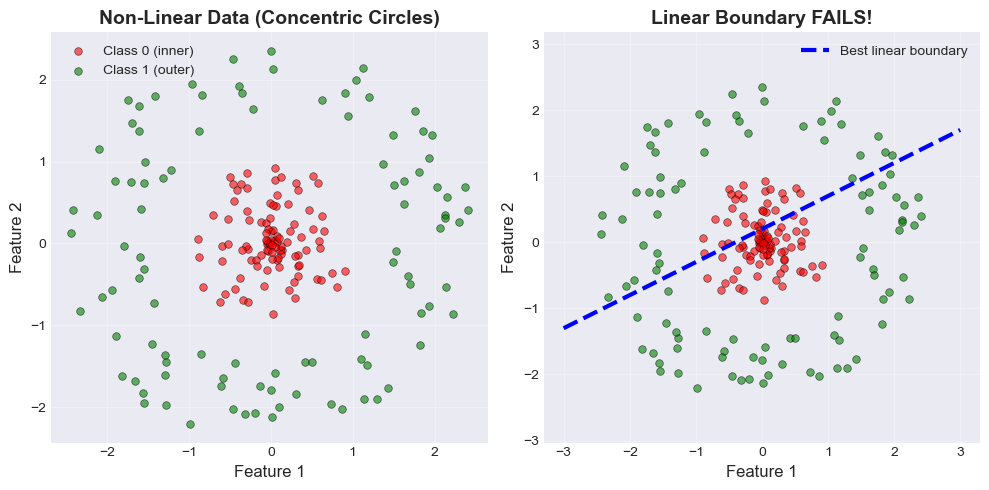

❌ Problem: No straight line can separate these circles!
✅ Solution: We need NON-LINEAR decision boundaries!
⚡ How? Add ACTIVATION FUNCTIONS to introduce non-linearity!


In [33]:
# Create a non-linear dataset (circle pattern)
np.random.seed(42)
n_points = 200

# Inner circle (class 0)
r_inner = np.random.uniform(0, 1, n_points//2)
theta_inner = np.random.uniform(0, 2*np.pi, n_points//2)
x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)

# Outer circle (class 1)
r_outer = np.random.uniform(1.5, 2.5, n_points//2)
theta_outer = np.random.uniform(0, 2*np.pi, n_points//2)
x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_inner, y_inner, c='red', alpha=0.6, s=30, label='Class 0 (inner)', edgecolors='k', linewidth=0.5)
plt.scatter(x_outer, y_outer, c='green', alpha=0.6, s=30, label='Class 1 (outer)', edgecolors='k', linewidth=0.5)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Non-Linear Data (Concentric Circles)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(x_inner, y_inner, c='red', alpha=0.6, s=30, edgecolors='k', linewidth=0.5)
plt.scatter(x_outer, y_outer, c='green', alpha=0.6, s=30, edgecolors='k', linewidth=0.5)
# Try to draw a straight line to separate them
x_line = np.linspace(-3, 3, 100)
y_line = 0.5 * x_line + 0.2  # Some random line
plt.plot(x_line, y_line, 'b--', linewidth=3, label='Best linear boundary')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Linear Boundary FAILS!', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()

print("❌ Problem: No straight line can separate these circles!")
print("✅ Solution: We need NON-LINEAR decision boundaries!")
print("⚡ How? Add ACTIVATION FUNCTIONS to introduce non-linearity!")

---
## 💡 Analogies: Understanding Activation Functions

### Analogy 1: Light Switch vs Dimmer Switch

**Step Function (Binary Activation)**
- Like a **light switch**: either ON or OFF
- No middle ground
- Simple but too rigid

**Sigmoid/Tanh (Smooth Activation)**
- Like a **dimmer switch**: smoothly adjusts from off to on
- Many values in between
- More flexible!

**ReLU (Rectified Linear)**
- Like a **one-way valve**: lets positive flow through, blocks negative
- Simple and effective
- Most popular today!

### Analogy 2: Signal Processing

Think of activation functions as **filters**:
- **Step**: "Only pass strong signals" (threshold)
- **Sigmoid**: "Squash everything into a range" (normalize)
- **ReLU**: "Keep positive, discard negative" (one-way gate)
- **Tanh**: "Center everything around zero" (balanced output)

---
## 📊 Activation Function #1: Step Function

The **step function** was one of the first activation functions used in neural networks.

### Formula
$$f(x) = \begin{cases} 
1 & \text{if } x \geq 0 \\
0 & \text{if } x < 0
\end{cases}$$

In words: **"If input is positive or zero, output 1. Otherwise, output 0."**

In [34]:
def step_function(x):
    """
    Step function (also called Heaviside function).
    
    Output is binary: 0 or 1
    - If input >= 0: return 1 (neuron 'fires')
    - If input < 0: return 0 (neuron stays quiet)
    
    Args:
        x: Input value or array
    
    Returns:
        Binary output (0 or 1)
    """
    # Use numpy's where: if condition is true, return 1, else return 0
    return np.where(x >= 0, 1, 0)

# Test it
test_values = np.array([-2, -1, 0, 1, 2])
step_outputs = step_function(test_values)

print("Step Function Test:")
for val, out in zip(test_values, step_outputs):
    print(f"  input: {val:>3} → output: {out}")

Step Function Test:
  input:  -2 → output: 0
  input:  -1 → output: 0
  input:   0 → output: 1
  input:   1 → output: 1
  input:   2 → output: 1


---

## 📊 Activation Function #2: Sigmoid

The **sigmoid function** (also called the **logistic function**) smoothly maps any input to a value between 0 and 1.

### Formula
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

### Derivative (for backpropagation)
$$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$

This elegant derivative property makes sigmoid convenient for gradient descent!

In [35]:
def sigmoid(x):
    """
    Sigmoid activation function.
    
    Maps input to range (0, 1):
    - Large negative values → close to 0
    - Zero → 0.5
    - Large positive values → close to 1
    
    Args:
        x: Input value or array
    
    Returns:
        Output in range (0, 1)
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid function.
    
    This is used during backpropagation to compute gradients.
    The derivative has a convenient form: σ'(x) = σ(x) * (1 - σ(x))
    
    Args:
        x: Input value or array
    
    Returns:
        Derivative value at x
    """
    s = sigmoid(x)
    return s * (1 - s)

# Test it
test_values = np.array([-5, -2, 0, 2, 5])
sigmoid_outputs = sigmoid(test_values)

print("Sigmoid Function Test:")
for val, out in zip(test_values, sigmoid_outputs):
    print(f"  input: {val:>3} → output: {out:.4f}")
    
print("\nNote how outputs are always between 0 and 1!")
print(f"  Negative inputs → close to 0")
print(f"  Zero → exactly 0.5")
print(f"  Positive inputs → close to 1")

Sigmoid Function Test:
  input:  -5 → output: 0.0067
  input:  -2 → output: 0.1192
  input:   0 → output: 0.5000
  input:   2 → output: 0.8808
  input:   5 → output: 0.9933

Note how outputs are always between 0 and 1!
  Negative inputs → close to 0
  Zero → exactly 0.5
  Positive inputs → close to 1


### 📈 Visualizing Sigmoid

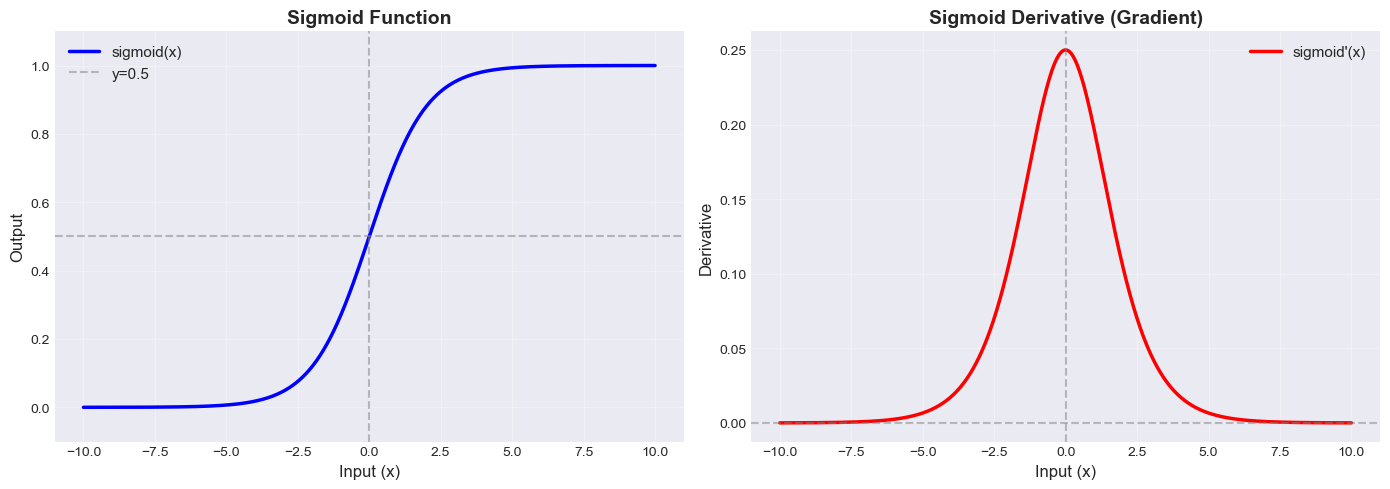

📊 Observations:
  • Sigmoid output: smooth S-curve, always between 0 and 1
  • Derivative: bell-shaped, maximum at x=0 (value = 0.25)
  • Derivative approaches 0 for large |x| → vanishing gradient problem!


In [36]:
# Create input range
x = np.linspace(-10, 10, 1000)
y_sigmoid = sigmoid(x)
y_sigmoid_deriv = sigmoid_derivative(x)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot sigmoid function
ax1.plot(x, y_sigmoid, 'b-', linewidth=2.5, label='sigmoid(x)')
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='y=0.5')
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Input (x)', fontsize=12)
ax1.set_ylabel('Output', fontsize=12)
ax1.set_title('Sigmoid Function', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_ylim([-0.1, 1.1])

# Plot sigmoid derivative
ax2.plot(x, y_sigmoid_deriv, 'r-', linewidth=2.5, label="sigmoid'(x)")
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Input (x)', fontsize=12)
ax2.set_ylabel('Derivative', fontsize=12)
ax2.set_title('Sigmoid Derivative (Gradient)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("📊 Observations:")
print("  • Sigmoid output: smooth S-curve, always between 0 and 1")
print("  • Derivative: bell-shaped, maximum at x=0 (value = 0.25)")
print("  • Derivative approaches 0 for large |x| → vanishing gradient problem!")

### 💡 When to Use This

**✅ Pros (Good Things):**
- **Bounded output** (0, 1): Perfect for representing probabilities in yes/no classification
- **Smooth and differentiable**: The nice curve helps with learning
- **Clear interpretation**: You can think of the output as "How confident am I?"
- **Elegant derivative**: The math formula σ'(x) = σ(x)(1-σ(x)) is easy to compute

**❌ Cons (Watch Out For):**
- **Vanishing gradients**: When inputs get too large (above 5 or below -5), the gradients become very small and learning slows down a lot
- **Not zero-centered**: All outputs are positive, which can make learning zigzag around
- **Expensive computation**: The exp() calculation is slower than simpler operations
- **Saturation**: Neurons can get stuck outputting values very close to 0 or 1

**🎯 When to Use It:**
- ✅ **Output layer** for binary classification (yes/no questions)
- ✅ When you need probability interpretation (like "80% confident")
- ✅ Special mechanisms like LSTM gates
- ❌ **Avoid** for hidden layers in deep networks (ReLU works much better!)

**⚠️ Common Mistakes:**
1. **Using in deep networks**: The gradients get really small in layers far from the output, making learning super slow
2. **Poor initialization**: Starting with big weights makes neurons get stuck immediately
3. **Ignoring numerical stability**: Very negative numbers can cause computer math errors

**💭 Things to Know:**
- Modern neural networks don't use sigmoid much in hidden layers anymore
- It's still the go-to choice for binary classification outputs!
- In fancy architectures like transformers, it's used in gates but not as the main activation
- Initialize your weights carefully (using Xavier or Glorot methods) to keep neurons from getting stuck

---

## 📊 Activation Function #3: Tanh

The **hyperbolic tangent (tanh)** function is similar to sigmoid but maps inputs to the range (-1, 1) instead of (0, 1).

### Formula
$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

Alternative form: $\tanh(x) = \frac{2}{1 + e^{-2x}} - 1$

### Derivative (for backpropagation)
$$\tanh'(x) = 1 - \tanh^2(x)$$

This elegant derivative makes tanh efficient for gradient descent!

In [37]:
def tanh(x):
    """
    Hyperbolic tangent activation function.
    
    Maps input to range (-1, 1):
    - Large negative values → close to -1
    - Zero → 0
    - Large positive values → close to 1
    
    Args:
        x: Input value or array
    
    Returns:
        Output in range (-1, 1)
    """
    return np.tanh(x)

def tanh_derivative(x):
    """
    Derivative of tanh function.
    
    This is used during backpropagation to compute gradients.
    The derivative has a convenient form: tanh'(x) = 1 - tanh²(x)
    
    Args:
        x: Input value or array
    
    Returns:
        Derivative value at x
    """
    t = tanh(x)
    return 1 - t**2

# Test it
test_values = np.array([-5, -2, 0, 2, 5])
tanh_outputs = tanh(test_values)

print("Tanh Function Test:")
for val, out in zip(test_values, tanh_outputs):
    print(f"  input: {val:>3} → output: {out:>7.4f}")
    
print("\nNote how outputs are always between -1 and 1!")
print(f"  Negative inputs → close to -1")
print(f"  Zero → exactly 0 (ZERO-CENTERED!)")
print(f"  Positive inputs → close to 1")

Tanh Function Test:
  input:  -5 → output: -0.9999
  input:  -2 → output: -0.9640
  input:   0 → output:  0.0000
  input:   2 → output:  0.9640
  input:   5 → output:  0.9999

Note how outputs are always between -1 and 1!
  Negative inputs → close to -1
  Zero → exactly 0 (ZERO-CENTERED!)
  Positive inputs → close to 1


### 📈 Visualizing Tanh

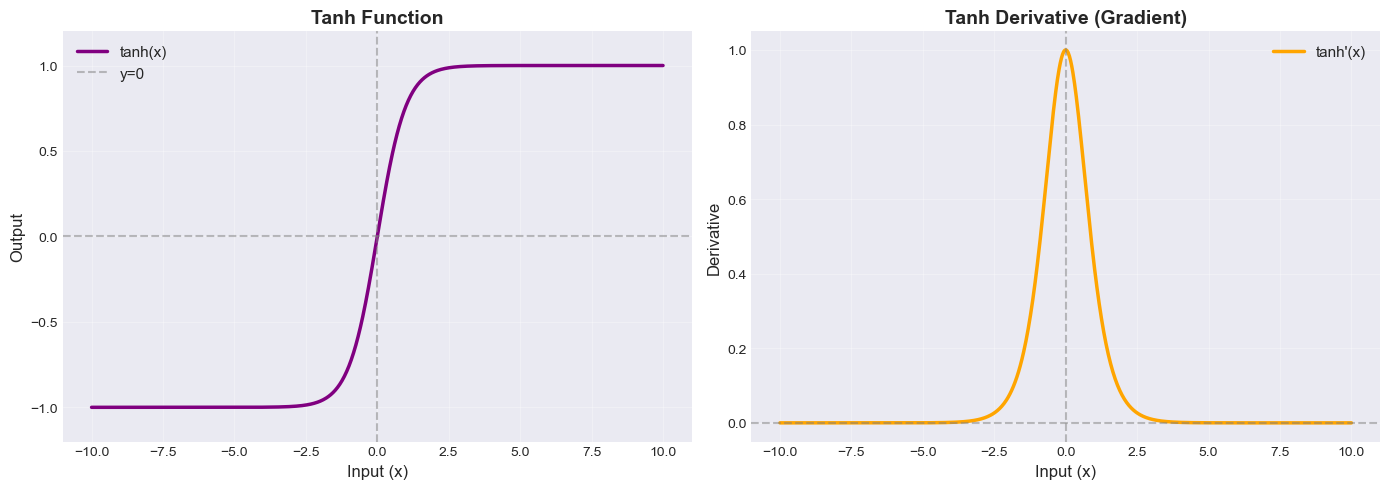

📊 Observations:
  • Tanh output: smooth S-curve, always between -1 and 1
  • ZERO-CENTERED: Unlike sigmoid, outputs centered at 0
  • Derivative: bell-shaped, maximum at x=0 (value = 1)
  • Derivative approaches 0 for large |x| → still has vanishing gradient!


In [38]:
# Create input range
x = np.linspace(-10, 10, 1000)
y_tanh = tanh(x)
y_tanh_deriv = tanh_derivative(x)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot tanh function
ax1.plot(x, y_tanh, 'purple', linewidth=2.5, label='tanh(x)')
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5, label='y=0')
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Input (x)', fontsize=12)
ax1.set_ylabel('Output', fontsize=12)
ax1.set_title('Tanh Function', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_ylim([-1.2, 1.2])

# Plot tanh derivative
ax2.plot(x, y_tanh_deriv, 'orange', linewidth=2.5, label="tanh'(x)")
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Input (x)', fontsize=12)
ax2.set_ylabel('Derivative', fontsize=12)
ax2.set_title('Tanh Derivative (Gradient)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("📊 Observations:")
print("  • Tanh output: smooth S-curve, always between -1 and 1")
print("  • ZERO-CENTERED: Unlike sigmoid, outputs centered at 0")
print("  • Derivative: bell-shaped, maximum at x=0 (value = 1)")
print("  • Derivative approaches 0 for large |x| → still has vanishing gradient!")

### 💡 When to Use This

**✅ Pros (Good Things):**
- **Zero-centered output** (-1, 1): Better gradient flow than sigmoid - outputs can be positive OR negative
- **Stronger gradients**: Maximum gradient is 1 (compared to 0.25 for sigmoid) - learns faster!
- **Smooth and differentiable**: The nice curve helps with learning
- **Elegant derivative**: The math formula tanh'(x) = 1 - tanh²(x) is easy to compute

**❌ Cons (Watch Out For):**
- **Vanishing gradients**: When inputs get too large (above 3 or below -3), gradients get really small - learning slows down
- **Expensive computation**: The exp() calculations are slower than simpler operations
- **Saturation**: Neurons can still get stuck at extreme values (-1 or 1)

**🎯 When to Use It:**
- ✅ **RNNs and LSTMs**: This is the standard choice for these sequence models
- ✅ **Hidden layers** when you need zero-centered outputs
- ✅ When your inputs are normalized and you need balanced output
- ❌ **Avoid for very deep networks** (ReLU variants work better)

**⚠️ Common Mistakes:**
1. **Using in very deep CNNs**: Gradients still get too small, use ReLU instead
2. **Poor initialization**: Starting with big weights makes neurons get stuck right away
3. **Forgetting normalization**: Works best when your data is already normalized

**�� Things to Know:**
- This is the go-to choice for RNN and LSTM hidden states
- Better than sigmoid for hidden layers, but ReLU is usually even better
- The zero-centered nature (outputs around 0) helps with learning
- Initialize with Xavier or Glorot methods for best results

---

## 📊 Activation Function #4: ReLU

The **Rectified Linear Unit (ReLU)** is the **most popular** activation function in modern deep learning!

### Formula
$$f(x) = \max(0, x) = \begin{cases} 
x & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}$$

### Derivative (for backpropagation)
$$f'(x) = \begin{cases} 
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}$$

Incredibly simple, yet remarkably effective!

In [39]:
def relu(x):
    """
    Rectified Linear Unit (ReLU) activation function.
    
    The most popular activation in modern deep learning!
    - Positive values: pass through unchanged
    - Negative values: set to zero
    
    Args:
        x: Input value or array
    
    Returns:
        max(0, x)
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU function.
    
    Returns 1 for positive inputs, 0 for negative.
    Note: Undefined at x=0, but we use 0 by convention.
    
    Args:
        x: Input value or array
    
    Returns:
        Derivative value at x (0 or 1)
    """
    return np.where(x > 0, 1, 0)

# Test it
test_values = np.array([-5, -2, 0, 2, 5])
relu_outputs = relu(test_values)

print("ReLU Function Test:")
for val, out in zip(test_values, relu_outputs):
    print(f"  input: {val:>3} → output: {out:>3}")
    
print("\nKey property:")
print(f"  Negative inputs → 0 (killed)")
print(f"  Positive inputs → unchanged (passed through)")
print(f"  Dead simple, yet incredibly effective!")

ReLU Function Test:
  input:  -5 → output:   0
  input:  -2 → output:   0
  input:   0 → output:   0
  input:   2 → output:   2
  input:   5 → output:   5

Key property:
  Negative inputs → 0 (killed)
  Positive inputs → unchanged (passed through)
  Dead simple, yet incredibly effective!


### 📈 Visualizing ReLU

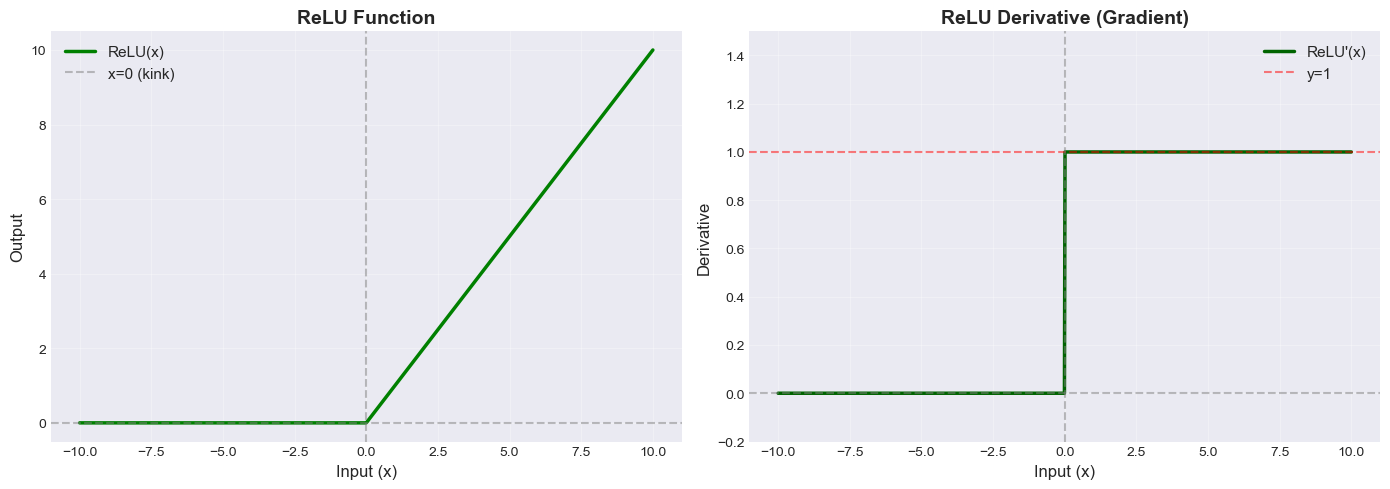

📊 Observations:
  • ReLU output: Simple kink at x=0
  • Derivative: Step function (0 or 1)
  • NO vanishing gradient for positive inputs!
  • Discontinuity at x=0 (but works fine in practice)
  • Very computationally efficient (just a max operation)


In [40]:
# Create input range
x = np.linspace(-10, 10, 1000)
y_relu = relu(x)
y_relu_deriv = relu_derivative(x)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot ReLU function
ax1.plot(x, y_relu, 'green', linewidth=2.5, label='ReLU(x)')
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5, label='x=0 (kink)')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Input (x)', fontsize=12)
ax1.set_ylabel('Output', fontsize=12)
ax1.set_title('ReLU Function', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Plot ReLU derivative
ax2.plot(x, y_relu_deriv, 'darkgreen', linewidth=2.5, label="ReLU'(x)")
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='y=1')
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Input (x)', fontsize=12)
ax2.set_ylabel('Derivative', fontsize=12)
ax2.set_title('ReLU Derivative (Gradient)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.set_ylim([-0.2, 1.5])

plt.tight_layout()
plt.show()

print("📊 Observations:")
print("  • ReLU output: Simple kink at x=0")
print("  • Derivative: Step function (0 or 1)")
print("  • NO vanishing gradient for positive inputs!")
print("  • Discontinuity at x=0 (but works fine in practice)")
print("  • Very computationally efficient (just a max operation)")

### 💡 When to Use This

**✅ Pros (Good Things):**
- **No vanishing gradient** for positive inputs: Gradient is always 1 - learning doesn't slow down!
- **Super fast**: Just `max(0, x)`, no expensive math operations
- **Sparse activation**: About half of neurons output zero, which is actually good for efficiency
- **Works really well**: This is the default choice that most people use
- **Fast convergence**: Networks learn faster than with sigmoid or tanh

**❌ Cons (Watch Out For):**
- **Dying ReLU problem**: Neurons can get stuck outputting zero forever (they "die")
- **Not zero-centered**: All outputs are positive or zero, which can cause some learning issues
- **Unbounded**: Outputs can grow really large
- **Not differentiable at x=0**: Technically undefined at zero, but we just use 0 by convention

**🎯 When to Use It:**
- ✅ **DEFAULT for hidden layers** - Start here! Works for most neural networks
- ✅ Computer vision tasks (CNNs)
- ✅ When you need fast training
- ✅ When you want sparse representations (lots of zeros)
- ❌ **Not for output layers** (use sigmoid or softmax instead)

**⚠️ Common Mistakes:**
1. **Dying ReLU**: High learning rates or bad initialization can kill neurons
   - Solution: Use smaller learning rate and He initialization
2. **Exploding activations**: Outputs can grow really big causing problems
   - Solution: Use batch normalization or gradient clipping
3. **Using for output layers**: ReLU outputs aren't probabilities!
   - Solution: Use sigmoid (binary) or softmax (multi-class) for outputs

**💭 Things to Know:**
- This has been the industry standard since around 2012
- Use **He initialization** (special weight setup) for ReLU networks
- If neurons start dying, try **Leaky ReLU** instead
- Combine with **batch normalization** for best results
- Most famous pre-trained models (ResNet, VGG, etc.) use ReLU

---

## 📊 Activation Function #5: Leaky ReLU

**Leaky ReLU** addresses the dying ReLU problem by allowing a small gradient for negative inputs.

### Formula
$$f(x) = \max(\alpha x, x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}$$

where $\alpha$ is a small constant (typically 0.01)

### Derivative
$$f'(x) = \begin{cases} 
1 & \text{if } x > 0 \\
\alpha & \text{if } x \leq 0
\end{cases}$$

Small but non-zero gradient for negative values!

In [ ]:
def leaky_relu(x, alpha=0.01):
    """
    Leaky ReLU activation function.
    
    Like ReLU, but allows small negative values:
    - Positive values: pass through unchanged
    - Negative values: multiply by small alpha (default 0.01)
    
    Args:
        x: Input value or array
        alpha: Slope for negative values (default: 0.01)
    
    Returns:
        max(alpha*x, x)
    """
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    """
    Derivative of Leaky ReLU function.
    
    Returns 1 for positive inputs, alpha for negative.
    
    Args:
        x: Input value or array
        alpha: Slope for negative values (default: 0.01)
    
    Returns:
        Derivative value at x (alpha or 1)
    """
    return np.where(x > 0, 1, alpha)

# Test it
test_values = np.array([-5, -2, 0, 2, 5])
leaky_relu_outputs = leaky_relu(test_values)

print("Leaky ReLU Function Test (alpha=0.01):")
for val, out in zip(test_values, leaky_relu_outputs):
    print(f"  input: {val:>3} → output: {out:>6.2f}")
    
print("\nKey difference from ReLU:")
print(f"  Negative inputs → small non-zero values (not killed!)")
print(f"  Positive inputs → unchanged (same as ReLU)")
print(f"  Prevents neurons from dying completely")

### 📈 Visualizing Leaky ReLU with Different Alphas

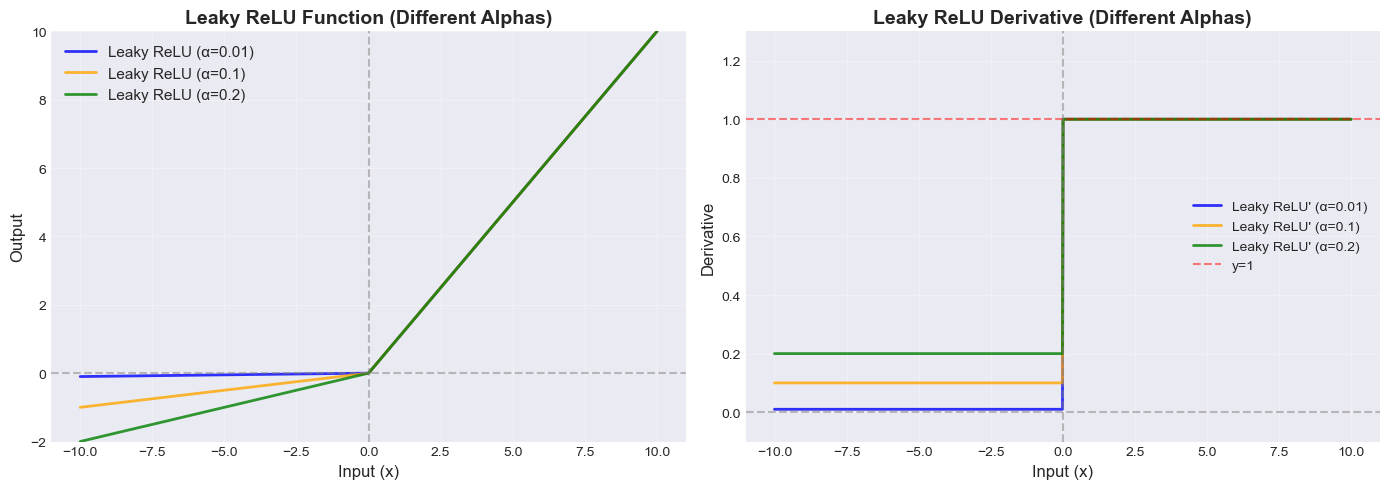

📊 Observations:
  • Larger alpha → steeper negative slope
  • Small gradient exists for ALL inputs (no dead neurons!)
  • Very similar to ReLU for positive inputs
  • Typical alpha values: 0.01 to 0.3


In [41]:
# Create input range
x = np.linspace(-10, 10, 1000)

# Different alpha values
alphas = [0.01, 0.1, 0.2]
colors = ['blue', 'orange', 'green']

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Leaky ReLU function with different alphas
for alpha, color in zip(alphas, colors):
    y = leaky_relu(x, alpha=alpha)
    ax1.plot(x, y, color=color, linewidth=2, label=f'Leaky ReLU (α={alpha})', alpha=0.8)

ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Input (x)', fontsize=12)
ax1.set_ylabel('Output', fontsize=12)
ax1.set_title('Leaky ReLU Function (Different Alphas)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_ylim([-2, 10])

# Plot derivatives
for alpha, color in zip(alphas, colors):
    y_deriv = leaky_relu_derivative(x, alpha=alpha)
    ax2.plot(x, y_deriv, color=color, linewidth=2, label=f"Leaky ReLU' (α={alpha})", alpha=0.8)

ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='y=1')
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Input (x)', fontsize=12)
ax2.set_ylabel('Derivative', fontsize=12)
ax2.set_title('Leaky ReLU Derivative (Different Alphas)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_ylim([-0.1, 1.3])

plt.tight_layout()
plt.show()

print("📊 Observations:")
print("  • Larger alpha → steeper negative slope")
print("  • Small gradient exists for ALL inputs (no dead neurons!)")
print("  • Very similar to ReLU for positive inputs")
print("  • Typical alpha values: 0.01 to 0.3")

### 💡 When to Use This

**✅ Pros (Good Things):**
- **Solves dying ReLU**: Neurons can't completely die because there's always a small gradient
- **Allows negative values**: Small slope for negative inputs keeps gradients flowing
- **Same speed as ReLU**: Still super fast to compute
- **Works well**: Often matches or beats regular ReLU

**❌ Cons (Watch Out For):**
- **Inconsistent performance**: Sometimes helps a lot, sometimes doesn't make much difference
- **Extra hyperparameter**: You need to choose alpha (though 0.01 usually works fine)
- **Still not zero-centered**: Positive inputs still give positive outputs

**🎯 When to Use It:**
- ✅ When you see **dying ReLU problems** (neurons stuck at zero)
- ✅ As an **alternative to ReLU** when regular ReLU isn't working well
- ✅ Deep networks where you need gradients to flow smoothly
- ✅ When you want to experiment with different activation functions

**🔧 Variants to Know:**
- **PReLU** (Parametric ReLU): The computer learns the best alpha value during training
  - Formula: `f(x) = max(αx, x)` where α is trainable
  - More flexible but adds extra parameters to learn
- **ELU** (Exponential Linear Unit): Uses a smooth curve for negative values
  - Formula: `f(x) = x if x > 0 else α(e^x - 1)`
  - Closer to zero-mean outputs

**⚠️ Common Mistakes:**
1. **Overthinking alpha**: Just use 0.01 - it works well in most cases
2. **Using when not needed**: Try regular ReLU first, switch to Leaky ReLU only if you have issues
3. **Expecting miracles**: Won't fix all dying neuron problems - might need to adjust learning rate too

**💭 Things to Know:**
- Good **backup option** when ReLU causes problems
- **PReLU** has been used in some winning machine learning competitions
- Not as universally used as ReLU, but a solid alternative
- Default alpha=0.01 rarely needs changing

---

## 📊 Activation Function #6: Softmax

**Softmax** is special - it's used **ONLY for output layers** in multi-class classification!

### Formula
For a vector $\mathbf{x} = [x_1, x_2, ..., x_n]$:

$$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$$

### Key Property
$$\sum_{i=1}^n \text{softmax}(x_i) = 1$$

Outputs are **probabilities** that sum to 1!

In [42]:
def softmax(x):
    """
    Softmax activation function.
    
    Converts a vector of values into a probability distribution.
    Used ONLY for output layer in multi-class classification.
    
    Numerically stable implementation (subtract max to prevent overflow).
    
    Args:
        x: Input array (logits)
    
    Returns:
        Probability distribution (sums to 1)
    """
    # Subtract max for numerical stability (prevents overflow)
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

def softmax_naive(x):
    """
    Naive softmax (can overflow for large values).
    
    Included for educational purposes - shows why we need
    the numerically stable version.
    
    Args:
        x: Input array (logits)
    
    Returns:
        Probability distribution
    """
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

# Test it with a multi-class example
print("Softmax Function Test - 5 Class Classification:")
print("=" * 50)

# Example: Network outputs (logits) for 5 classes
logits = np.array([2.0, 1.0, 0.1, 3.0, 0.5])
probabilities = softmax(logits)

print("\nInput (logits):")
for i, logit in enumerate(logits):
    print(f"  Class {i}: {logit:>6.2f}")

print("\nOutput (probabilities):")
for i, prob in enumerate(probabilities):
    print(f"  Class {i}: {prob:>6.4f} ({prob*100:>5.2f}%)")

print(f"\n✓ Sum of probabilities: {np.sum(probabilities):.10f}")
print(f"✓ Predicted class: {np.argmax(probabilities)} (highest probability)")

# Show numerical stability
print("\n" + "="*50)
print("Numerical Stability Demonstration:")
large_logits = np.array([1000, 1001, 1002])

try:
    naive_result = softmax_naive(large_logits)
    print(f"Naive softmax: {naive_result}")
except:
    print("⚠️  Naive softmax: OVERFLOW ERROR!")

stable_result = softmax(large_logits)
print(f"Stable softmax: {stable_result}")
print("✓ Stable version works even with large values!")

Softmax Function Test - 5 Class Classification:

Input (logits):
  Class 0:   2.00
  Class 1:   1.00
  Class 2:   0.10
  Class 3:   3.00
  Class 4:   0.50

Output (probabilities):
  Class 0: 0.2243 (22.43%)
  Class 1: 0.0825 ( 8.25%)
  Class 2: 0.0335 ( 3.35%)
  Class 3: 0.6096 (60.96%)
  Class 4: 0.0500 ( 5.00%)

✓ Sum of probabilities: 1.0000000000
✓ Predicted class: 3 (highest probability)

Numerical Stability Demonstration:
Naive softmax: [nan nan nan]
Stable softmax: [0.09003057 0.24472847 0.66524096]
✓ Stable version works even with large values!


/var/folders/98/5zng120j50n14r9zjqftvvq00000gn/T/ipykernel_53669/3571731682.py:33: RuntimeWarning: overflow encountered in exp
  exp_x = np.exp(x)
/var/folders/98/5zng120j50n14r9zjqftvvq00000gn/T/ipykernel_53669/3571731682.py:34: RuntimeWarning: invalid value encountered in divide
  return exp_x / np.sum(exp_x)


### 📈 Visualizing Softmax

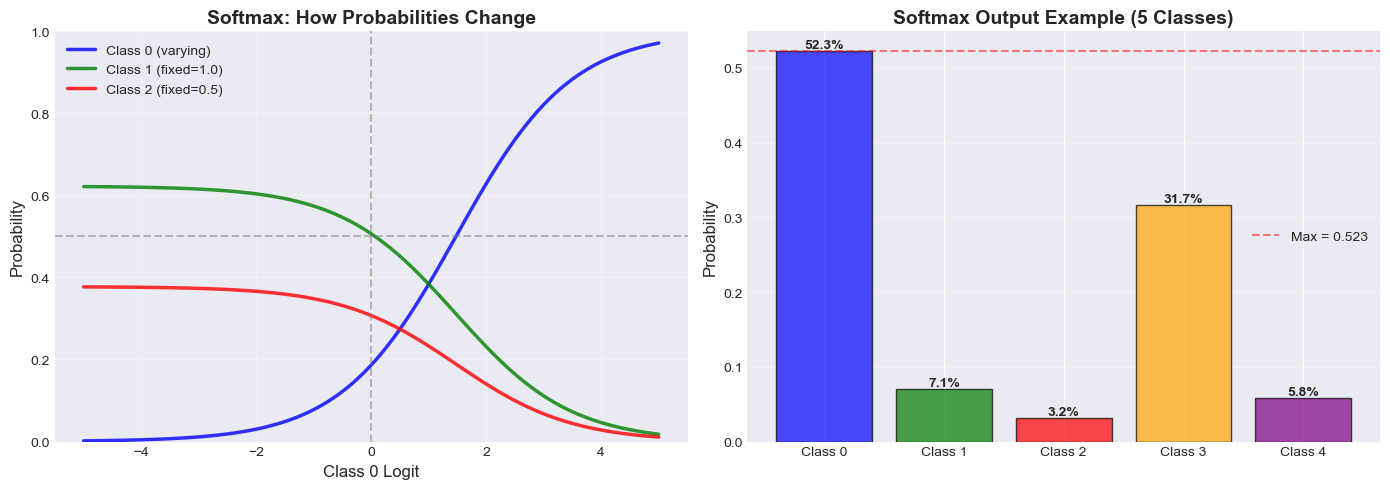

📊 Observations:
  • All probabilities sum to 1.0 (probability distribution)
  • Higher logit → higher probability
  • Increasing one class decreases others (competitive)
  • Predicted class: 0 (highest bar)


In [43]:
# Create a practical example: 3-class classification
# Vary one logit while keeping others fixed
fixed_logits = np.array([1.0, 0.5])  # Classes 1 and 2
varying_logit = np.linspace(-5, 5, 100)  # Class 0 varies

# Compute probabilities for each case
probs_class0 = []
probs_class1 = []
probs_class2 = []

for val in varying_logit:
    logits = np.array([val, fixed_logits[0], fixed_logits[1]])
    probs = softmax(logits)
    probs_class0.append(probs[0])
    probs_class1.append(probs[1])
    probs_class2.append(probs[2])

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot how probabilities change
ax1.plot(varying_logit, probs_class0, 'b-', linewidth=2.5, label='Class 0 (varying)', alpha=0.8)
ax1.plot(varying_logit, probs_class1, 'g-', linewidth=2.5, label='Class 1 (fixed=1.0)', alpha=0.8)
ax1.plot(varying_logit, probs_class2, 'r-', linewidth=2.5, label='Class 2 (fixed=0.5)', alpha=0.8)
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Class 0 Logit', fontsize=12)
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Softmax: How Probabilities Change', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_ylim([0, 1])

# Bar chart example for specific logits
example_logits = np.array([3.0, 1.0, 0.2, 2.5, 0.8])
example_probs = softmax(example_logits)
classes = [f'Class {i}' for i in range(len(example_logits))]

bars = ax2.bar(classes, example_probs, color=['blue', 'green', 'red', 'orange', 'purple'], alpha=0.7, edgecolor='black')
ax2.axhline(y=np.max(example_probs), color='red', linestyle='--', alpha=0.5, label=f'Max = {np.max(example_probs):.3f}')
ax2.set_ylabel('Probability', fontsize=12)
ax2.set_title('Softmax Output Example (5 Classes)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Add percentage labels on bars
for bar, prob in zip(bars, example_probs):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{prob*100:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 Observations:")
print("  • All probabilities sum to 1.0 (probability distribution)")
print("  • Higher logit → higher probability")
print("  • Increasing one class decreases others (competitive)")
print(f"  • Predicted class: {np.argmax(example_probs)} (highest bar)")

### 💡 When to Use This

**✅ Pros (Good Things):**
- **Probability interpretation**: Outputs are real probabilities that sum to 1.0
- **Differentiable**: The smooth curve helps with learning
- **Multi-class**: Can handle any number of classes (2, 10, 1000, etc.)
- **Pairs well with cross-entropy**: Makes the math work out nicely for loss calculation

**❌ Cons (Watch Out For):**
- **Computationally expensive**: Needs to calculate exp() for ALL classes
- **Numerical instability**: Really large values can cause computer overflow errors (need the stable version!)
- **Sensitive to outliers**: One really large input dominates all the probabilities
- **Not for hidden layers**: Only makes sense for the final output

**🎯 When to Use It:**
- ✅ **OUTPUT LAYER ONLY** for multi-class classification (when each example belongs to ONE class)
- ✅ When you need a probability distribution over classes
- ✅ With categorical cross-entropy loss
- ❌ **NEVER in hidden layers** (use ReLU, tanh, etc. instead)
- ❌ **Not for multi-label** classification where examples can belong to multiple classes (use sigmoid instead)

**⚠️ Common Mistakes:**
1. **Using naive implementation**: Always use the numerically stable version (subtract max value first)
2. **Applying to hidden layers**: Softmax is ONLY for the output layer!
3. **Multi-label confusion**: Softmax assumes ONE correct class. For multiple labels, use sigmoid on each class
4. **Forgetting temperature scaling**: For model calibration, you can use `softmax(logits/T)` where T is temperature

**💡 Numerical Stability Trick:**
```python
# BAD (can overflow with big numbers):
exp(x) / sum(exp(x))

# GOOD (numerically stable):
exp(x - max(x)) / sum(exp(x - max(x)))
```
Here's the trick: subtracting the max value first keeps the numbers smaller and prevents overflow!

**💭 Things to Know:**
- This is the **universal standard** for multi-class classification outputs
- Often combined with log-softmax for better numerical stability in loss functions
- PyTorch's `CrossEntropyLoss` combines softmax + log + negative log-likelihood automatically
- **Temperature scaling** is used for model calibration and knowledge distillation
- For huge vocabularies (like in NLP): consider **sampled softmax** or **hierarchical softmax** for speed

### 🌡️ Temperature Scaling in Softmax

**Temperature scaling** is an important technique that adjusts the "confidence" of softmax outputs by dividing logits by a temperature parameter `T` before applying softmax:

$$\text{softmax}_T(x_i) = \frac{e^{x_i/T}}{\sum_{j=1}^n e^{x_j/T}}$$

**How Temperature Affects Probabilities:**

- **T = 1**: Standard softmax (no change)
- **T > 1**: Makes probabilities more uniform ("softer", less confident)
  - Higher temperature smooths the distribution
  - Reduces the difference between high and low probability classes
- **T < 1**: Makes probabilities more peaked ("sharper", more confident)
  - Lower temperature emphasizes the highest probability class
  - Creates more extreme probability distributions

**When to Use It:**
- **Model Calibration**: Adjust predicted probabilities to better match true confidence levels
- **Knowledge Distillation**: Use high temperature to transfer "soft" predictions from teacher to student models
- **Sampling**: Control randomness when sampling from language models (lower T = more deterministic, higher T = more random)

Let's see temperature scaling in action with a simple example:

Original logits: [3.  1.  0.2 2.  0.5]

Softmax with different temperatures:

T = 0.5:
  Class 0: 0.8590 (85.90%)
  Class 1: 0.0157 (1.57%)
  Class 2: 0.0032 (0.32%)
  Class 3: 0.1163 (11.63%)
  Class 4: 0.0058 (0.58%)
  Max probability: 0.8590
  Entropy: 0.4941 (higher = more uncertain)

T = 1.0:
  Class 0: 0.6075 (60.75%)
  Class 1: 0.0822 (8.22%)
  Class 2: 0.0369 (3.69%)
  Class 3: 0.2235 (22.35%)
  Class 4: 0.0499 (4.99%)
  Max probability: 0.6075
  Entropy: 1.1144 (higher = more uncertain)

T = 2.0:
  Class 0: 0.3988 (39.88%)
  Class 1: 0.1467 (14.67%)
  Class 2: 0.0983 (9.83%)
  Class 3: 0.2419 (24.19%)
  Class 4: 0.1143 (11.43%)
  Max probability: 0.3988
  Entropy: 1.4674 (higher = more uncertain)

T = 5.0:
  Class 0: 0.2727 (27.27%)
  Class 1: 0.1828 (18.28%)
  Class 2: 0.1558 (15.58%)
  Class 3: 0.2233 (22.33%)
  Class 4: 0.1654 (16.54%)
  Max probability: 0.2727
  Entropy: 1.5870 (higher = more uncertain)


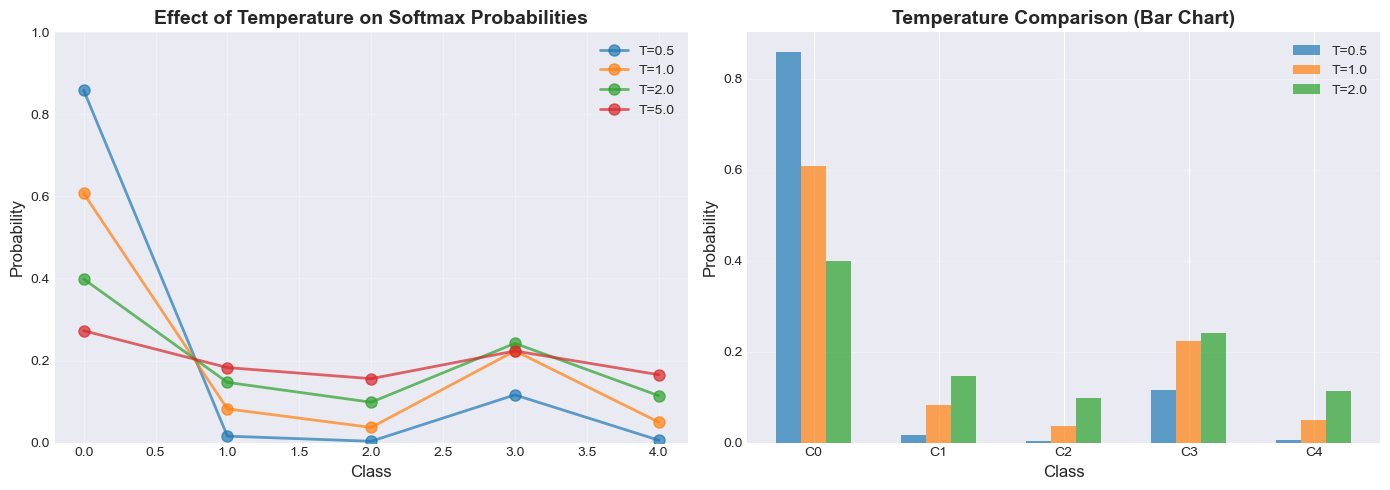


📊 Key Observations:
• T < 1 (e.g., 0.5): Probabilities become MORE peaked - model is MORE confident
• T = 1: Standard softmax - normal confidence
• T > 1 (e.g., 2.0, 5.0): Probabilities become MORE uniform - model is LESS confident
• Higher T = higher entropy = more uncertainty in predictions


In [44]:
# Temperature scaling example
import numpy as np
import matplotlib.pyplot as plt

def softmax_with_temperature(logits, temperature=1.0):
    """Softmax with temperature scaling
    
    Args:
        logits: Input logits (unnormalized scores)
        temperature: Temperature parameter (T)
                    T=1: standard softmax
                    T>1: softer probabilities
                    T<1: sharper probabilities
    
    Returns:
        Probability distribution
    """
    # Divide by temperature before applying softmax
    scaled_logits = logits / temperature
    exp_logits = np.exp(scaled_logits - np.max(scaled_logits))  # Numerical stability
    return exp_logits / np.sum(exp_logits)

# Example: Model predictions for 5 classes
logits = np.array([3.0, 1.0, 0.2, 2.0, 0.5])

# Try different temperatures
temperatures = [0.5, 1.0, 2.0, 5.0]

print("Original logits:", logits)
print("\nSoftmax with different temperatures:")
print("=" * 70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for T in temperatures:
    probs = softmax_with_temperature(logits, temperature=T)
    print(f"\nT = {T}:")
    for i, p in enumerate(probs):
        print(f"  Class {i}: {p:.4f} ({p*100:.2f}%)")
    print(f"  Max probability: {np.max(probs):.4f}")
    print(f"  Entropy: {-np.sum(probs * np.log(probs + 1e-10)):.4f} (higher = more uncertain)")
    
    # Plot
    ax1.plot(range(len(probs)), probs, 'o-', linewidth=2, markersize=8, label=f'T={T}', alpha=0.7)

ax1.set_xlabel('Class', fontsize=12)
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Effect of Temperature on Softmax Probabilities', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Bar chart comparison
x = np.arange(len(logits))
width = 0.2

for idx, T in enumerate([0.5, 1.0, 2.0]):
    probs = softmax_with_temperature(logits, temperature=T)
    offset = (idx - 1) * width
    ax2.bar(x + offset, probs, width, label=f'T={T}', alpha=0.7)

ax2.set_xlabel('Class', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.set_title('Temperature Comparison (Bar Chart)', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([f'C{i}' for i in range(len(logits))])
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print("• T < 1 (e.g., 0.5): Probabilities become MORE peaked - model is MORE confident")
print("• T = 1: Standard softmax - normal confidence")
print("• T > 1 (e.g., 2.0, 5.0): Probabilities become MORE uniform - model is LESS confident")
print("• Higher T = higher entropy = more uncertainty in predictions")


---

## 📊 Comparative Visualization: All Activation Functions

Let's compare all activation functions side-by-side to see their differences!

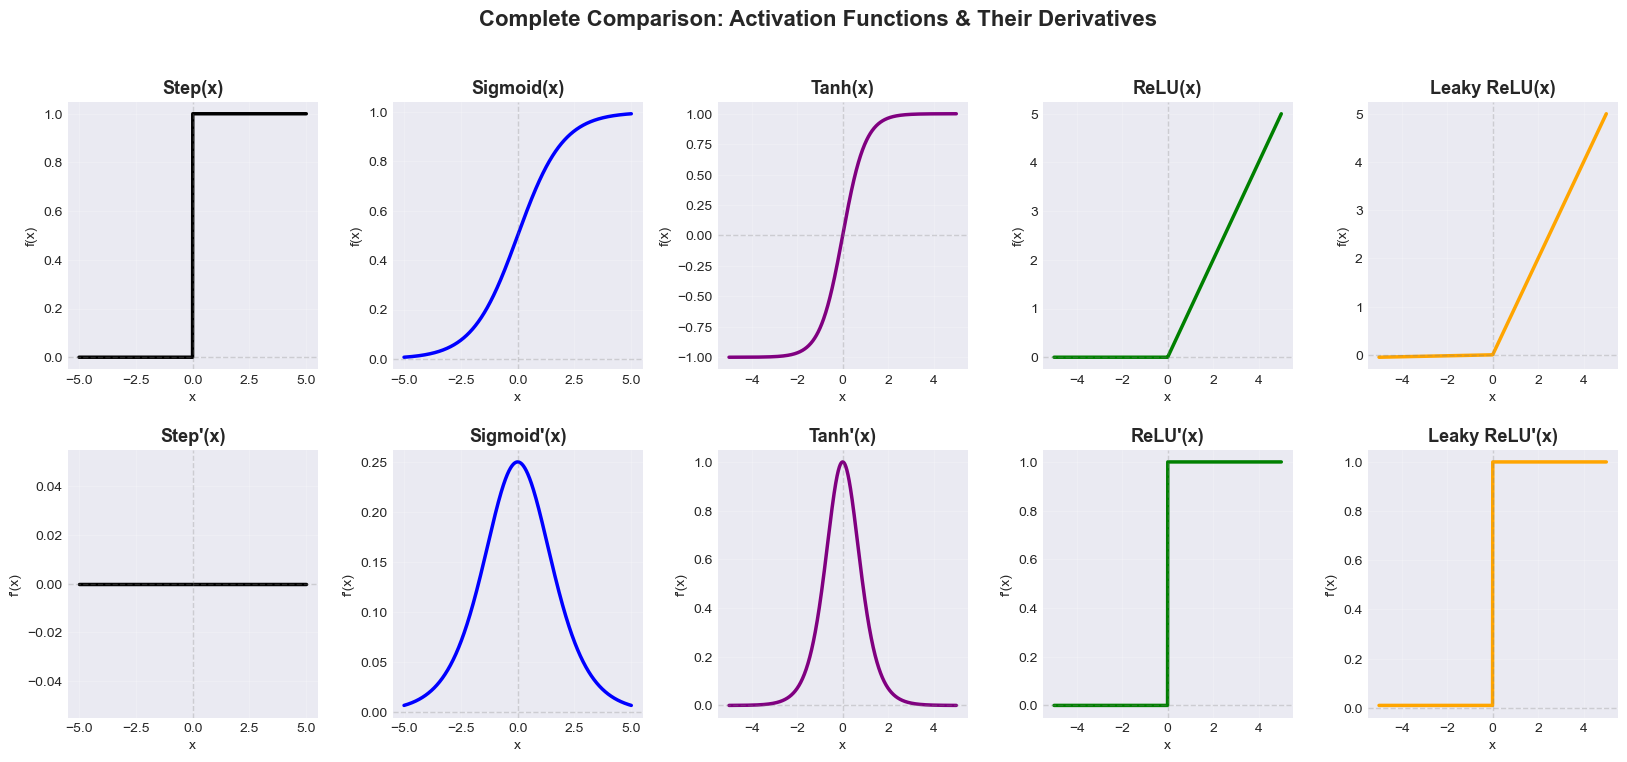


📊 Key Comparisons:

Output Ranges:
  • Step:       {0, 1}
  • Sigmoid:    (0, 1)
  • Tanh:       (-1, 1) - ZERO-CENTERED
  • ReLU:       [0, ∞)
  • Leaky ReLU: (-∞, ∞)

Gradient Properties:
  • Step:       Not differentiable (zero everywhere)
  • Sigmoid:    Vanishing gradient (max = 0.25)
  • Tanh:       Vanishing gradient (max = 1.0)
  • ReLU:       No vanishing for x > 0 (gradient = 1)
  • Leaky ReLU: Small gradient everywhere (no dead neurons)

Computational Cost:
  • Step:       Cheapest (comparison)
  • ReLU:       Very cheap (max operation)
  • Leaky ReLU: Very cheap (max + multiply)
  • Sigmoid:    Expensive (exp operation)
  • Tanh:       Expensive (exp operation)


In [45]:
# Create comprehensive comparison
x = np.linspace(-5, 5, 1000)

# Compute all functions
y_step = step_function(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky = leaky_relu(x, alpha=0.01)

# Compute all derivatives
y_step_deriv = np.zeros_like(x)  # Step has zero derivative (not differentiable)
y_sigmoid_deriv = sigmoid_derivative(x)
y_tanh_deriv = tanh_derivative(x)
y_relu_deriv = relu_derivative(x)
y_leaky_deriv = leaky_relu_derivative(x, alpha=0.01)

# Create 2x5 subplot grid
fig = plt.figure(figsize=(20, 8))
gs = GridSpec(2, 5, figure=fig, hspace=0.3, wspace=0.3)

# Row 1: Activation functions
functions = [
    ('Step', y_step, 'black'),
    ('Sigmoid', y_sigmoid, 'blue'),
    ('Tanh', y_tanh, 'purple'),
    ('ReLU', y_relu, 'green'),
    ('Leaky ReLU', y_leaky, 'orange')
]

for i, (name, y, color) in enumerate(functions):
    ax = fig.add_subplot(gs[0, i])
    ax.plot(x, y, color=color, linewidth=2.5)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3, linewidth=1)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.3, linewidth=1)
    ax.grid(True, alpha=0.2)
    ax.set_title(f'{name}(x)', fontsize=13, fontweight='bold')
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('f(x)', fontsize=10)
    
# Row 2: Derivatives
derivatives = [
    ('Step', y_step_deriv, 'black'),
    ('Sigmoid', y_sigmoid_deriv, 'blue'),
    ('Tanh', y_tanh_deriv, 'purple'),
    ('ReLU', y_relu_deriv, 'green'),
    ('Leaky ReLU', y_leaky_deriv, 'orange')
]

for i, (name, y_deriv, color) in enumerate(derivatives):
    ax = fig.add_subplot(gs[1, i])
    ax.plot(x, y_deriv, color=color, linewidth=2.5)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3, linewidth=1)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.3, linewidth=1)
    ax.grid(True, alpha=0.2)
    ax.set_title(f"{name}'(x)", fontsize=13, fontweight='bold')
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel("f'(x)", fontsize=10)

plt.suptitle('Complete Comparison: Activation Functions & Their Derivatives', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

print("\n📊 Key Comparisons:")
print("\nOutput Ranges:")
print("  • Step:       {0, 1}")
print("  • Sigmoid:    (0, 1)")
print("  • Tanh:       (-1, 1) - ZERO-CENTERED")
print("  • ReLU:       [0, ∞)")
print("  • Leaky ReLU: (-∞, ∞)")
print("\nGradient Properties:")
print("  • Step:       Not differentiable (zero everywhere)")
print("  • Sigmoid:    Vanishing gradient (max = 0.25)")
print("  • Tanh:       Vanishing gradient (max = 1.0)")
print("  • ReLU:       No vanishing for x > 0 (gradient = 1)")
print("  • Leaky ReLU: Small gradient everywhere (no dead neurons)")
print("\nComputational Cost:")
print("  • Step:       Cheapest (comparison)")
print("  • ReLU:       Very cheap (max operation)")
print("  • Leaky ReLU: Very cheap (max + multiply)")
print("  • Sigmoid:    Expensive (exp operation)")
print("  • Tanh:       Expensive (exp operation)")

---

## 🎯 Key Takeaways

Here's your cheat sheet for choosing activation functions:

| Function | Range | Use Case | Pros | Cons |
|----------|-------|----------|------|------|
| **Step** | {0,1} | Historical only | Simple, binary | Not differentiable |
| **Sigmoid** | (0,1) | Binary classification OUTPUT | Probability interpretation | Vanishing gradient, not zero-centered |
| **Tanh** | (-1,1) | RNN hidden states | Zero-centered, stronger gradients | Still vanishing gradient |
| **ReLU** | [0,∞) | **DEFAULT for hidden layers** | Fast, no vanishing gradient | Dying neurons, not zero-centered |
| **Leaky ReLU** | (-∞,∞) | When ReLU fails | Prevents dying neurons | Inconsistent gains |
| **Softmax** | (0,1), Σ=1 | Multi-class OUTPUT ONLY | True probabilities | Expensive, only for output |

### 🎓 Modern Best Practices (2024)

**For Hidden Layers:**
1. **Start with ReLU** - Default choice, works 90% of the time
2. **Try Leaky ReLU** - If you see dying neurons
3. **Use Tanh** - For RNNs/LSTMs
4. **Avoid Sigmoid** - Unless you have specific reasons

**For Output Layers:**
1. **Binary classification** → Sigmoid (with BCE loss)
2. **Multi-class classification** → Softmax (with CE loss)
3. **Multi-label classification** → Sigmoid for each label
4. **Regression** → No activation (or ReLU if outputs must be positive)

**Architecture-Specific:**
- **CNNs**: ReLU (or Leaky ReLU)
- **RNNs/LSTMs**: Tanh for hidden, Sigmoid for gates
- **Transformers**: GELU, ReLU variants
- **GANs**: Leaky ReLU (both generator & discriminator)

## 🎯 Quick Decision Guide: Choosing the Right Activation Function

### How to Choose Your Activation Function

Here's a friendly guide to help you pick the right activation function!

```
START: Need an activation function?
│
├─ Is this the OUTPUT layer?
│  ├─ YES → What's your task?
│  │  ├─ Binary classification (yes/no) → SIGMOID
│  │  ├─ Multi-class (pick ONE category) → SOFTMAX
│  │  ├─ Multi-label (can be MULTIPLE categories) → SIGMOID (for each label)
│  │  └─ Regression (predicting a number) → LINEAR (no activation)
│  │
│  └─ NO → Hidden layer, continue below...
│
├─ What type of neural network?
│  ├─ CNN (Computer Vision)
│  │  └─ Start with: ReLU
│  │     └─ If neurons die → Try Leaky ReLU (α=0.01)
│  │
│  ├─ RNN / LSTM (Sequences like text)
│  │  ├─ Hidden states → TANH
│  │  └─ Gates → SIGMOID
│  │
│  ├─ Fully Connected / MLP (Basic neural network)
│  │  └─ Start with: ReLU
│  │     └─ If it doesn't work well → Try Leaky ReLU or Tanh
│  │
│  └─ Transformer
│     └─ GELU or ReLU variants
│
└─ Special needs?
   ├─ Need outputs centered around 0? → Tanh or Leaky ReLU
   ├─ Need outputs bounded (limited range)? → Sigmoid or Tanh
   ├─ Want lots of zeros (sparse)? → ReLU
   └─ Speed is critical? → ReLU (fastest!)
```

### Weight Initialization Guide

**Match your weight initialization to your activation function:**

| Activation | Best Initialization | Formula |
|------------|---------------------|---------||
| **ReLU / Leaky ReLU** | He initialization | $w \sim \mathcal{N}(0, \sqrt{2/n_{in}})$ |
| **Sigmoid / Tanh** | Xavier/Glorot | $w \sim \mathcal{N}(0, \sqrt{2/(n_{in}+n_{out})})$ |
| **Linear** | Xavier/Glorot | $w \sim \mathcal{N}(0, \sqrt{2/(n_{in}+n_{out})})$ |

**Why this matters:**
- Wrong initialization → neurons get stuck → gradients vanish → learning fails
- He init works better for ReLU because ReLU sets half the values to zero
- Xavier init keeps variance balanced across layers for sigmoid and tanh

### Common Mistakes to Avoid

❌ **Using Sigmoid in hidden layers of deep networks**
- Problem: Gradients get too small and learning stops
- Solution: Use ReLU instead

❌ **Using Softmax in hidden layers**
- Problem: Makes no sense mathematically - softmax is only for outputs!
- Solution: Softmax ONLY for output layer

❌ **Using ReLU for output layer**
- Problem: Can't represent probabilities or negative values
- Solution: Use Sigmoid (binary) or Softmax (multi-class) for outputs

❌ **Ignoring dying ReLU neurons**
- Problem: Big chunks of your network stop learning
- Solution: Lower learning rate, try Leaky ReLU, or check your weight initialization

❌ **Using the simple (naive) softmax**
- Problem: Numbers overflow and computer math breaks
- Solution: Always use the numerically stable version (subtract max first)

### Helpful Tips

1. **Start Simple**: ReLU works great most of the time - start there!
2. **Watch Your Neurons**: Keep track of how many neurons output zero
3. **Use Batch Normalization**: Helps prevent neurons from getting stuck
4. **Learning Rate Matters**: Too high → neurons die, too low → slow learning
5. **Try Different Things**: If stuck, experiment with different activations
6. **Speed Check**: ReLU is about 10x faster than Sigmoid!
7. **Monitor Gradients**: Watch for gradients becoming too small or too large

### Debugging Checklist

Network not learning? Check these:

- [ ] Are gradients vanishing? (Using Sigmoid/Tanh in deep network?)
- [ ] Are neurons dying? (ReLU with too-high learning rate?)
- [ ] Are activations saturated? (Bad weight initialization?)
- [ ] Are outputs in the right range? (Wrong output activation?)
- [ ] Is softmax numerically stable? (Did you subtract max?)
- [ ] Does initialization match activation? (He for ReLU, Xavier for others?)

---

## 🚀 What's Next?

You now understand activation functions - the non-linear magic that makes neural networks powerful!

### Coming Up

In the next notebooks, we'll build on this foundation:

1. **Neural Network Layers** - Combining multiple neurons
2. **Forward Propagation** - How data flows through the network
3. **Loss Functions** - Measuring how wrong we are
4. **Backpropagation** - How networks learn (this is where derivatives matter!)

### Key Insights to Remember

🎯 **The Big Picture:**
- Activation functions add **non-linearity**
- Without them, deep networks = single layer
- Different activations for different purposes
- **ReLU is king** for hidden layers
- **Softmax/Sigmoid** for outputs only

🔧 **Practical Wisdom:**
- Always use numerically stable implementations
- Match initialization to activation function
- Monitor for dead/saturated neurons
- Start with defaults, experiment when needed

### Practice Exercises

Try implementing:
1. A simple 2-layer network with different activation combinations
2. Visualize activations on the circle dataset from the intro
3. Compare training speed with different activations
4. Implement PReLU (learnable alpha)

**Ready to build networks?** Let's move on to Neural Network Layers!